In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [172]:
flow60 = pd.read_excel('../data/Shipston Wiski data - 60 min.xlsx', 
                        sheet_name = 1)
flow60_filtered = flow60.replace(" ---", np.nan)
flow60_filtered['Flow [m³/s]'] = pd.to_numeric(
    flow60_filtered['Flow [m³/s]'], downcast="float")

In [173]:
stage60 = pd.read_excel('../data/Shipston Wiski data - 60 min.xlsx', 
                          sheet_name = 2)
stage60_filtered = stage60.replace(" ---", np.nan)
stage60_filtered['Stage [m]'] = pd.to_numeric(
    stage60_filtered['Stage [m]'], downcast="float")

In [76]:
rainfall60 = pd.read_excel('../data/Shipston Wiski data - 60 min.xlsx', 
                           sheet_name=3)
rainfall60_filtered = rainfall60.replace(
    " ---", np.nan).replace(".", np.nan).replace("  ---", np.nan)
rainfall60_filtered['Precipitation [mm]'] = pd.to_numeric(
    rainfall60_filtered['Precipitation [mm]'], downcast="float")

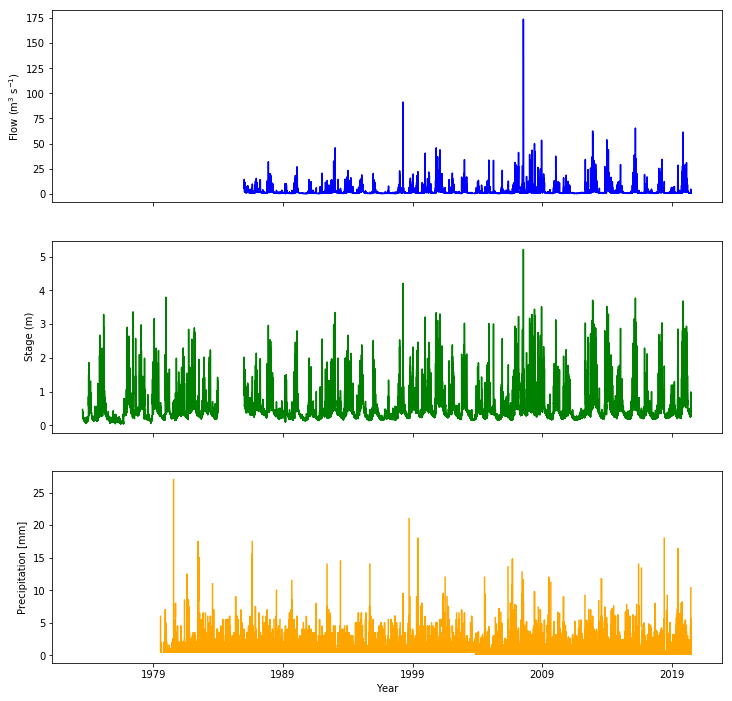

In [90]:
fig, axes = plt.subplots(3, 1, figsize=(12, 4*3), sharex=True)
axes[0].plot(flow60_filtered['Date'], flow60_filtered['Flow [m³/s]'], 'blue')
axes[0].set_ylabel("Flow (m$^3$ s$^{-1}$)")
axes[1].plot(stage60_filtered['Date'], stage60_filtered['Stage [m]'], 'green')
axes[1].set_ylabel("Stage (m)")
axes[2].plot(rainfall60_filtered['Date'], rainfall60_filtered['Precipitation [mm]'], 'orange')
axes[2].set_ylabel('Precipitation [mm]')
axes[2].set_xlabel('Year')
plt.savefig('../report/figures/wiski_60min_lineplots.png', dpi=600, bbox_inches='tight')
plt.savefig('../report/figures/wiski_60min_lineplots.pdf', bbox_inches='tight')

In [80]:
import skextremes as ske

In [182]:
def take_block_maxima(dataframe, key):
    
    date_time = []
    
    for i in range(len(dataframe['Time'])):
        
        time = dataframe['Time'][i]
        date = datetime.datetime.utcfromtimestamp(
            dataframe['Date'].to_numpy()[i].tolist()/1e9).date()
        date_time.append(datetime.datetime.combine(date, time))
        
    dataframe = dataframe.assign(datetime = date_time)
    dataframe = dataframe.set_index('datetime')    
    max_df = dataframe.groupby(lambda x: x.year)[key].agg(['mean', 'max'])
    
    return max_df

In [187]:
# max_rainfall60 = take_block_maxima(rainfall60_filtered, 'Precipitation [mm]')
max_stage60 = take_block_maxima(stage60_filtered, 'Stage [m]')
max_flow60 = take_block_maxima(flow60_filtered, 'Flow [m³/s]')

In [115]:
stage60_filtered['Date'] # .to_numpy()

0        1973-07-23
1        1973-07-23
2        1973-07-23
3        1973-07-23
4        1973-07-23
            ...    
411464   2020-06-30
411465   2020-06-30
411466   2020-06-30
411467   2020-06-30
411468   2020-06-30
Name: Date, Length: 411469, dtype: datetime64[ns]

In [126]:
# stage60_filtered['Date'].to_numpy()[0].astype(datetime.datetime)
datetime.datetime.utcfromtimestamp(stage60_filtered['Date'].to_numpy()[0].tolist()/1e9)

datetime.datetime(1973, 7, 23, 0, 0)

In [124]:
import datetime

In [137]:
time = stage60_filtered['Time'][0]

In [142]:
date = datetime.datetime.utcfromtimestamp(
    stage60_filtered['Date'].to_numpy()[0].tolist()/1e9).date()

In [165]:
datetime.datetime.combine(date, time)

datetime.datetime(2020, 6, 30, 23, 0)

In [188]:
max_stage60

,mean,max
1973,0.161979,0.472
1974,0.361597,2.673
1975,0.322657,3.287
1976,0.215633,2.683
1977,0.596479,3.362
1978,0.417860,2.978
1979,0.493622,3.796
1980,0.407105,1.989
1981,0.461751,2.845
1982,0.492006,2.889


In [189]:
max_flow60 

,mean,max
1986,1.917465,15.30
1987,1.702134,31.80
1988,1.460123,19.80
1989,1.078647,18.10
1990,1.127205,26.80
1991,0.779589,14.10
1992,1.685676,32.70
1993,1.500331,45.70
1994,1.698200,23.20
1995,1.433528,20.20
